In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="PT",
    user="postgres",
    password="12345", 
    port=5432
)


query = "SELECT * FROM customer_view;"
df = pd.read_sql(query, conn)

conn.close()

C:\Users\amet1\AppData\Local\Temp\ipykernel_20756\2874425006.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df.head()

,contract_date,consumption,last_financial_installment,remaining_financial_installments,bank_installment,remaining_bank_installments,customer_type,total_financial_amount,invoice_payment_date,payment_status
0,2007-08-28,0,202407,0.0,0.0,0.0,2,17,2025-06-15,1
1,2007-09-07,27,202407,0.0,0.0,0.0,0,88,2024-12-01,1
2,2007-09-03,0,202407,0.0,0.0,0.0,2,17,2024-12-01,1
3,2007-09-10,0,202407,0.0,0.0,0.0,2,17,2025-09-19,1
4,2007-11-03,0,202407,0.0,0.0,0.0,2,18,2024-12-01,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 10 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   contract_date                     object 
 1   consumption                       int64  
 2   last_financial_installment        int64  
 3   remaining_financial_installments  float64
 4   bank_installment                  float64
 5   remaining_bank_installments       float64
 6   customer_type                     int64  
 7   total_financial_amount            int64  
 8   invoice_payment_date              object 
 9   payment_status                    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 305.2+ MB


In [5]:
df['contract_date'] = pd.to_datetime(df['contract_date'], errors='coerce')
df['invoice_payment_date'] = pd.to_datetime(df['invoice_payment_date'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 10 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   contract_date                     datetime64[ns]
 1   consumption                       int64         
 2   last_financial_installment        int64         
 3   remaining_financial_installments  float64       
 4   bank_installment                  float64       
 5   remaining_bank_installments       float64       
 6   customer_type                     int64         
 7   total_financial_amount            int64         
 8   invoice_payment_date              datetime64[ns]
 9   payment_status                    object        
dtypes: datetime64[ns](2), float64(3), int64(4), object(1)
memory usage: 305.2+ MB


In [7]:
df.isnull().sum()

contract_date                       2586
consumption                            0
last_financial_installment             0
remaining_financial_installments       0
bank_installment                       0
remaining_bank_installments            0
customer_type                          0
total_financial_amount                 0
invoice_payment_date                   0
payment_status                         0
dtype: int64

In [8]:
df = df.dropna(subset=['contract_date'])

In [9]:
df.isnull().sum()

contract_date                       0
consumption                         0
last_financial_installment          0
remaining_financial_installments    0
bank_installment                    0
remaining_bank_installments         0
customer_type                       0
total_financial_amount              0
invoice_payment_date                0
payment_status                      0
dtype: int64

In [10]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicated: {duplicate_count}")

df = df.drop_duplicates()

duplicate_count = df.duplicated().sum()
print(f"after removal: {duplicate_count}")

Number of duplicated: 887454
after removal: 0


In [11]:
"""

numeric_cols = ['consumption', 'customer_type', 'receipt']

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    count_outliers = len(outliers)
    
    outlier_summary[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outliers_Count': count_outliers,
        'Outliers_Percentage': round((count_outliers / len(df)) * 100, 3)
    }
    
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df.sort_values('Outliers_Percentage', ascending=False, inplace=True)

print("\n Outlier Summary by Column:")
print(outlier_df)
"""


'\n\nnumeric_cols = [\'consumption\', \'customer_type\', \'receipt\']\n\noutlier_summary = {}\n\nfor col in numeric_cols:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]\n    count_outliers = len(outliers)\n\n    outlier_summary[col] = {\n        \'Lower_Bound\': lower_bound,\n        \'Upper_Bound\': upper_bound,\n        \'Outliers_Count\': count_outliers,\n        \'Outliers_Percentage\': round((count_outliers / len(df)) * 100, 3)\n    }\n\noutlier_df = pd.DataFrame(outlier_summary).T\noutlier_df.sort_values(\'Outliers_Percentage\', ascending=False, inplace=True)\n\nprint("\n Outlier Summary by Column:")\nprint(outlier_df)\n'

In [12]:
"""
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper
"""

'\nfor col in numeric_cols:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower = Q1 - 1.5 * IQR\n    upper = Q3 + 1.5 * IQR\n\n    df.loc[df[col] < lower, col] = lower\n    df.loc[df[col] > upper, col] = upper\n'

In [13]:
min_date = df['contract_date'].min()
max_date = df['contract_date'].max()

print("Oldest contract date:", min_date.date())
print("Newest contract date:", max_date.date())

Oldest contract date: 1981-06-01
Newest contract date: 2025-08-31


In [14]:
import datetime
df['contract_age_days'] = (datetime.datetime.now() - df['contract_date']).dt.days
df['invoice_age_days'] = (datetime.datetime.now() - df['invoice_payment_date']).dt.days
df = df.drop(['contract_date', 'invoice_payment_date'], axis=1)

In [15]:
df

,consumption,last_financial_installment,remaining_financial_installments,bank_installment,remaining_bank_installments,customer_type,total_financial_amount,payment_status,contract_age_days,invoice_age_days
0,0,202407,0.0,0.0,0.0,2,17,1,6652,151
1,27,202407,0.0,0.0,0.0,0,88,1,6642,347
2,0,202407,0.0,0.0,0.0,2,17,1,6646,347
3,0,202407,0.0,0.0,0.0,2,17,1,6639,55
4,0,202407,0.0,0.0,0.0,2,18,1,6585,347
...,...,...,...,...,...,...,...,...,...,...
3999990,28,202510,0.0,0.0,0.0,0,130,0,3517,347
3999991,0,202510,0.0,0.0,0.0,2,18,1,3522,24
3999992,117,202510,0.0,0.0,0.0,0,0,1,3535,43
3999993,6,202510,0.0,0.0,0.0,0,42,1,3508,24


In [16]:
df['payment_status'].value_counts()

payment_status
1    2913262
0     196698
Name: count, dtype: int64

In [17]:
X = df.drop('payment_status', axis=1)
y = df['payment_status'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=101)

In [30]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE - y_train value counts:")
print(pd.Series(y_train).value_counts())

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

if isinstance(X_train, pd.DataFrame):
    X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)

print("\nAfter SMOTE - y_train_res value counts:")
print(pd.Series(y_train_res).value_counts())

print(f"\nShapes -> X_train: {getattr(X_train,'shape',None)}, X_train_res: {X_train_res.shape}")
print(f"          X_test: {getattr(X_test,'shape',None)}, y_train: {getattr(y_train,'shape',None)}, y_test: {getattr(y_test,'shape',None)}")


Before SMOTE - y_train value counts:
1    2039284
0    2039284
Name: count, dtype: int64

After SMOTE - y_train_res value counts:
1    2039284
0    2039284
Name: count, dtype: int64

Shapes -> X_train: (4078568, 9), X_train_res: (4078568, 9)
          X_test: (932988, 9), y_train: (4078568,), y_test: (932988,)


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ("scaler", StandardScaler()),   
    ("clf", RandomForestClassifier(
        n_estimators=100,
        n_jobs=-1,
        class_weight={'0':5, '1':1},
        random_state=42
    ))
])

In [32]:
X_train = X_train_res
y_train = y_train_res

In [33]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(class_weight={'0': 5, '1': 1},
                                        n_jobs=-1, random_state=42))])

In [34]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9688066727546335

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     59010
           1       0.99      0.97      0.98    873978

    accuracy                           0.97    932988
   macro avg       0.85      0.93      0.88    932988
weighted avg       0.97      0.97      0.97    932988


Confusion Matrix:
[[ 52111   6899]
 [ 22204 851774]]


Accuracy: 0.9688066727546335


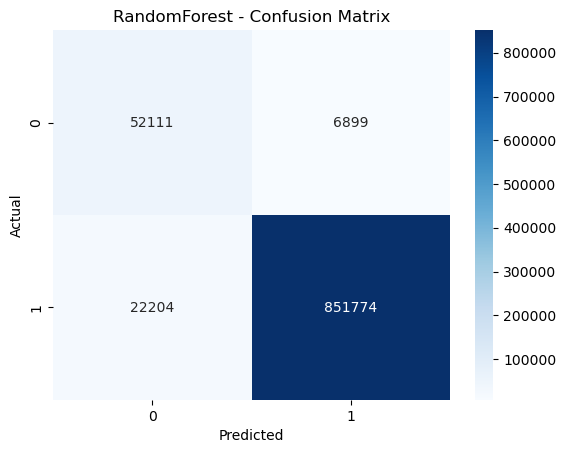

In [35]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("RandomForest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
import joblib
joblib.dump(model, "pt_rf_model.pkl")

['pt_rf_model.pkl']

In [37]:
import joblib
joblib.dump(model, "pt_rf_model_compressed.pkl",compress=3)

['pt_rf_model_compressed.pkl']